In [1]:
#import the libraries
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
#read the data
train=pd.read_excel("Data_Train.xlsx")
test=pd.read_excel("Data_Test.xlsx")

# EDA

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7628 entries, 0 to 7627
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   STORY    7628 non-null   object
 1   SECTION  7628 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 119.3+ KB


In [4]:
train.head()

,STORY,SECTION
0,But the most painful was the huge reversal in ...,3
1,How formidable is the opposition alliance amon...,0
2,Most Asian currencies were trading lower today...,3
3,"If you want to answer any question, click on ‘...",1
4,"In global markets, gold prices edged up today ...",3


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2748 entries, 0 to 2747
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   STORY   2748 non-null   object
dtypes: object(1)
memory usage: 21.6+ KB


In [6]:
train['SECTION']=train.SECTION.astype("str").apply(lambda x:x.split(".")[0])

In [7]:
train.SECTION.unique()

array(['3', '0', '1', '2'], dtype=object)

In [8]:
train.isna().sum()

STORY      0
SECTION    0
dtype: int64

In [9]:
train.duplicated().sum()

77

In [10]:
train.drop_duplicates(inplace=True)
train.reset_index(drop=True,inplace=True)

In [11]:
test.duplicated().sum()

11

<AxesSubplot:title={'center':'Section bar chart'}, xlabel='Section', ylabel='Count'>

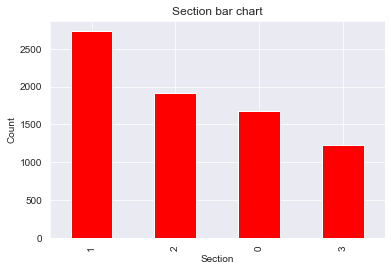

In [12]:
sns.set_style("darkgrid")
plt.title('Section bar chart')
plt.xlabel("Section")
plt.ylabel("Count")
train.SECTION.value_counts().plot(kind='bar',color='red')

In [13]:
data=train['STORY'].append(test['STORY'].drop_duplicates(keep='first'))

In [14]:
from utils import *

In [15]:
data=preprocess_txt(data)

In [16]:
train

,STORY,SECTION
0,But the most painful was the huge reversal in ...,3
1,How formidable is the opposition alliance amon...,0
2,Most Asian currencies were trading lower today...,3
3,"If you want to answer any question, click on ‘...",1
4,"In global markets, gold prices edged up today ...",3
...,...,...
7546,"Karnataka has been a Congress bastion, but it ...",0
7547,"The film, which also features Janhvi Kapoor, w...",2
7548,The database has been created after bringing t...,1
7549,"The state, which has had an uneasy relationshi...",0


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
vector=TfidfVectorizer()

In [18]:
vector.fit(data)

TfidfVectorizer()

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7551 entries, 0 to 7550
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   STORY    7551 non-null   object
 1   SECTION  7551 non-null   object
dtypes: object(2)
memory usage: 118.1+ KB


In [20]:
data.iloc[0:7551]

0       painful huge reversal fee income unheard among...
1       formidable opposition alliance among congress ...
2       asian currency trading lower today south korea...
3       want answer question click answer clicking ans...
4       global market gold price edged today disappoin...
                              ...                        
7546    karnataka congress bastion also gave bjp first...
7547    film also feature janhvi kapoor revolve around...
7548    database created bringing together criminal re...
7549    state uneasy relationship mainland since day l...
7550    virus star kunchacko boban tovino thomas indra...
Name: STORY, Length: 7551, dtype: object

In [21]:
train['article']=data.iloc[0:7551]

In [22]:
train

,STORY,SECTION,article
0,But the most painful was the huge reversal in ...,3,painful huge reversal fee income unheard among...
1,How formidable is the opposition alliance amon...,0,formidable opposition alliance among congress ...
2,Most Asian currencies were trading lower today...,3,asian currency trading lower today south korea...
3,"If you want to answer any question, click on ‘...",1,want answer question click answer clicking ans...
4,"In global markets, gold prices edged up today ...",3,global market gold price edged today disappoin...
...,...,...,...
7546,"Karnataka has been a Congress bastion, but it ...",0,karnataka congress bastion also gave bjp first...
7547,"The film, which also features Janhvi Kapoor, w...",2,film also feature janhvi kapoor revolve around...
7548,The database has been created after bringing t...,1,database created bringing together criminal re...
7549,"The state, which has had an uneasy relationshi...",0,state uneasy relationship mainland since day l...


In [23]:
X=train['article']
y=train['SECTION']

In [24]:
X=vector.transform(X)

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV,KFold
from sklearn.naive_bayes import MultinomialNB

In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=45)

In [27]:
model=MultinomialNB()

In [28]:
model.fit(X_train,y_train)

MultinomialNB()

In [29]:
y_pred=model.predict(X_test)
accuracy_score(y_test,y_pred)

0.9333627537511032

In [30]:
gs=GridSearchCV(model,param_grid={},cv=10,)

In [31]:
gs.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=MultinomialNB(), param_grid={})

In [32]:
y_pred=model.predict(X_test)
accuracy_score(y_test,y_pred)

0.9333627537511032

In [33]:
train.SECTION.unique()

array(['3', '0', '1', '2'], dtype=object)

In [34]:
train

,STORY,SECTION,article
0,But the most painful was the huge reversal in ...,3,painful huge reversal fee income unheard among...
1,How formidable is the opposition alliance amon...,0,formidable opposition alliance among congress ...
2,Most Asian currencies were trading lower today...,3,asian currency trading lower today south korea...
3,"If you want to answer any question, click on ‘...",1,want answer question click answer clicking ans...
4,"In global markets, gold prices edged up today ...",3,global market gold price edged today disappoin...
...,...,...,...
7546,"Karnataka has been a Congress bastion, but it ...",0,karnataka congress bastion also gave bjp first...
7547,"The film, which also features Janhvi Kapoor, w...",2,film also feature janhvi kapoor revolve around...
7548,The database has been created after bringing t...,1,database created bringing together criminal re...
7549,"The state, which has had an uneasy relationshi...",0,state uneasy relationship mainland since day l...


In [ ]:
****************** Testing model *********************

In [35]:
txt=train.iloc[7549,2]
txt=vector.transform([txt])
model.predict(txt)

array(['0'], dtype='<U1')

In [ ]:
****************** Preparing for submission *********************

In [39]:
test

,STORY
0,2019 will see gadgets like gaming smartphones ...
1,It has also unleashed a wave of changes in the...
2,It can be confusing to pick the right smartpho...
3,The mobile application is integrated with a da...
4,We have rounded up some of the gadgets that sh...
...,...
2743,"According to researchers, fraud in the mobile ..."
2744,The iPhone XS and XS Max share the Apple A12 c...
2745,"On the photography front, the Note 5 Pro featu..."
2746,UDAY mandated that discoms bring the gap betwe...


In [40]:
test['STORY']=preprocess_txt(test['STORY'])

In [41]:
test=vector.transform(test['STORY'])

In [43]:
y_pred=model.predict(test)

In [44]:
y_pred

array(['1', '2', '1', ..., '1', '0', '1'], dtype='<U1')

In [45]:
pd.DataFrame(y_pred,columns=['SECTION']).to_excel("SUBMISSION.xlsx",header=True,ind)

,SECTION
0,1
1,2
2,1
3,1
4,1
...,...
2743,1
2744,1
2745,1
2746,0
